In [7]:
import matplotlib.pyplot as plt
import json
from skimage import draw
import numpy as np
from PIL import Image
import os
import cv2

### name of annotator

In [1]:
annotator = "name"

#### convert json file at "path" to a masks in the shape of an image ("img)

In [8]:
def load_annotation(path, img):
    ann = json.load(open(path))

    # load all polygons
    polygons = []
    for shape in ann:
        polygons.append(shape['geometry']['coordinates'])

    # turn poligons to masks
    mask = np.zeros(img.shape[:2], dtype=np.uint8)
    for polygon in polygons:        
        if len(polygon) == 1:
            cv2.fillPoly(mask, np.array([polygon], dtype=np.int32), 255)
        else:
            cv2.fillPoly(mask, np.array([polygon[0]], dtype=np.int32), 255)
            cv2.fillPoly(mask, np.array([polygon[1]], dtype=np.int32), 255)
    return mask

#### Save the mask created with the "load_annotation" function in a folder ("saveto_dir") 

In [9]:
def json_to_mask(img_path, json_path, name):
    img = plt.imread(img_path)
     
    mask = load_annotation(json_path, img)
    plt.imshow(mask)
    plt.show()
    mask = Image.fromarray(mask)
    mask.save(annotator+"_masks/"+name+".png")

#### Apply the json_to_mask conversion on json+image files
#### json files are in annotator folder

In [10]:
images_path = r'C:\Work\human DRG\Images to annotate\Images\NFvsFabp7vsGS' #path where corresponding images are saved

NFvsFABP7vsGS_01.tif


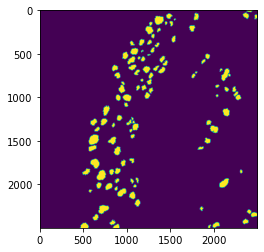

NFvsFABP7vsGS_02.tif


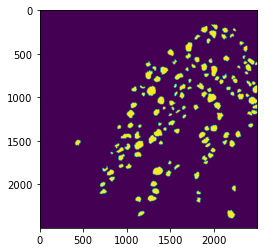

NFvsFABP7vsGS_03.tif


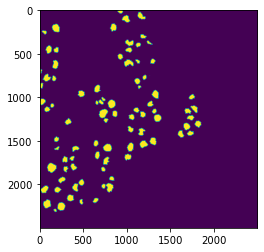

NFvsFABP7vsGS_04.tif


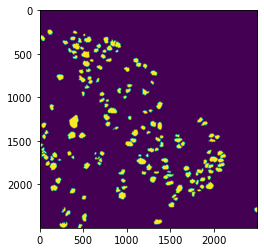

NFvsFABP7vsGS_05.tif


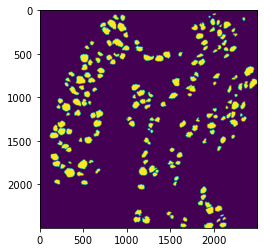

NFvsFABP7vsGS_06.tif


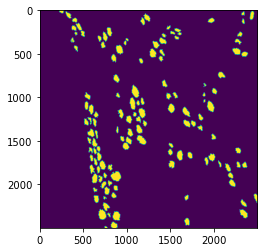

NFvsFABP7vsGS_07.tif


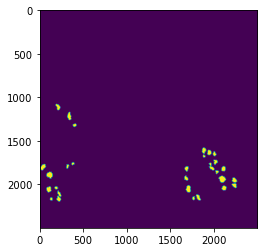

NFvsFABP7vsGS_08.tif


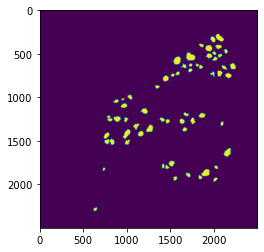

NFvsFABP7vsGS_09.tif


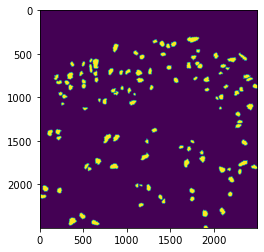

NFvsFABP7vsGS_10.tif


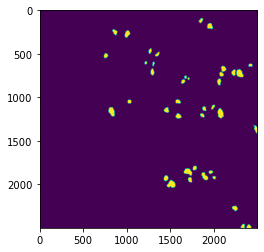

In [13]:
for img_name, json_name in zip(os.listdir(images_path), os.listdir(annotator+'_json')):
    img_path = os.path.join(images_path,img_name)
    json_path = os.path.join(annotator+'_json',json_name)
    name = img_name[:-4]
    print(img_name)
    json_to_mask(img_path, json_path, name)